In [11]:
#Kütüphaneler yüklendi

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

In [12]:
#Veri seti yüklendi

In [3]:
dataset=pd.read_csv(r"C:\Users\mahir\Downloads\train (2).csv")

In [13]:
#Yüklenen veri seti kabaca gözden geçirildi.

In [4]:
dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [14]:
#Veri setinin istatistiki değerleri incelendi.

In [6]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
# Değerler kontrol edildiğinde, bilet fiyatı 0,00 olarak görünen biletler bulunduğu, Fare, Parch ve SibSp değerlerinde
# standart sapmanın ortalama değerden yüksek olduğu, Age, SibSp, Parch ve Fare alanlarına uç değer analizi yapılmasının faydalı
# olacağı(%75 ile Max değeri arasında ciddi miktarda fark bulunduğu için) düşünülmüştür. 

In [18]:
dataset.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [19]:
# Metin değerler incelendiğinde; tüm isimlerin tekil olduğu, cinsiyet alanında 2 tekil değer bulunduğu dolayısıyla
# hatalı bir cinsiyet belirtilmediği, Bilet numaraları arasında bir biletin birden fazla yolcu tarafından kullanılabildiği,
# yolcular arasında erkek yolcuların fazla olduğu (577/891), Kabin alanında çok sayıda eksik değer bulunduğu ve 
# bir kabinin birden çok yolcu tarafından kullanılabildiği, biniş istasyonu eksik olan 2 adet değer olduğu ve 
# en çok yolcunun S kodlu istasyondan bindiği görülmüştür. 
# Veri seti hakkında bilgiler aşağıda devam edecektir. 

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [20]:
# Veri setimizde 5 adet tam sayı, 2 adet ondalıklı sayı ve 5 adet object nesnesi bulunmaktadır. Age, Cabin ve Embarked 
# alanları dışında eksik veri bulunmamaktadır. Veri kümemiz 83.7 KB büyüklüğündedir. 

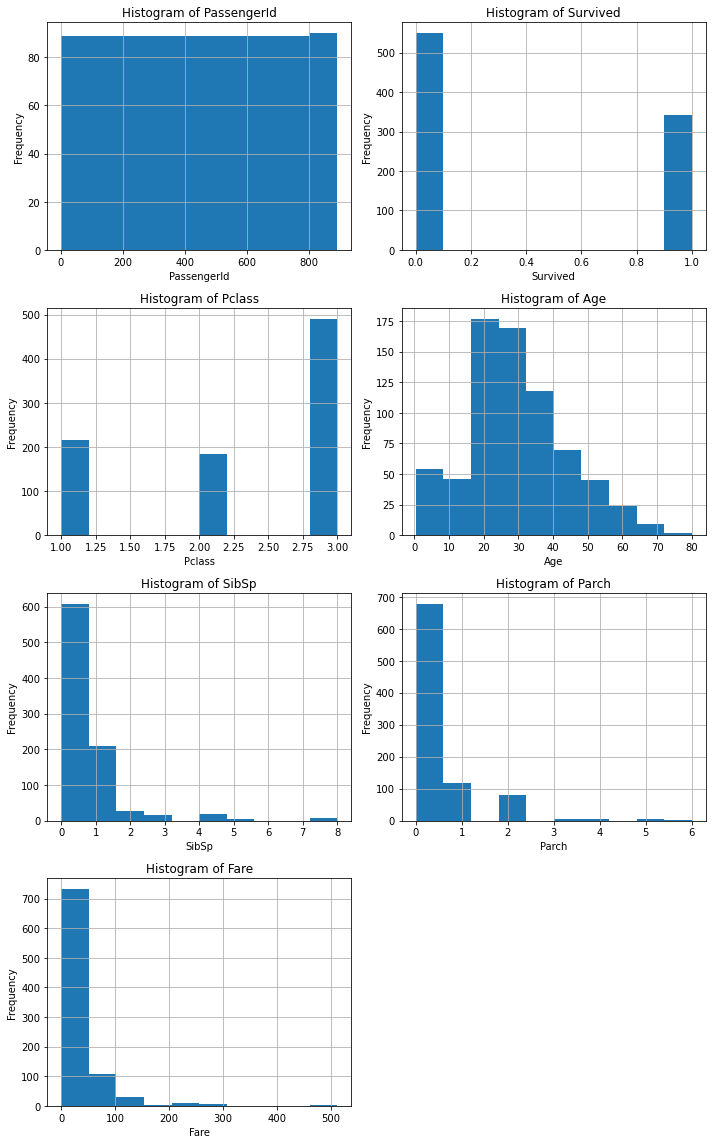

In [28]:
numerical_columns = dataset.select_dtypes(include=['number']).columns
num_plots = len(numerical_columns)
num_rows = math.ceil(num_plots / 2)

fig, axes = plt.subplots(num_rows, 2, figsize=(10, num_rows * 4))

for i, column in enumerate(numerical_columns):
    row = i // 2
    col = i % 2
    dataset[column].hist(ax=axes[row, col])
    axes[row, col].set_title(f'Histogram of {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')

# Eksik kalan subplot'ları kaldırma
for i in range(num_plots, num_rows * 2):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

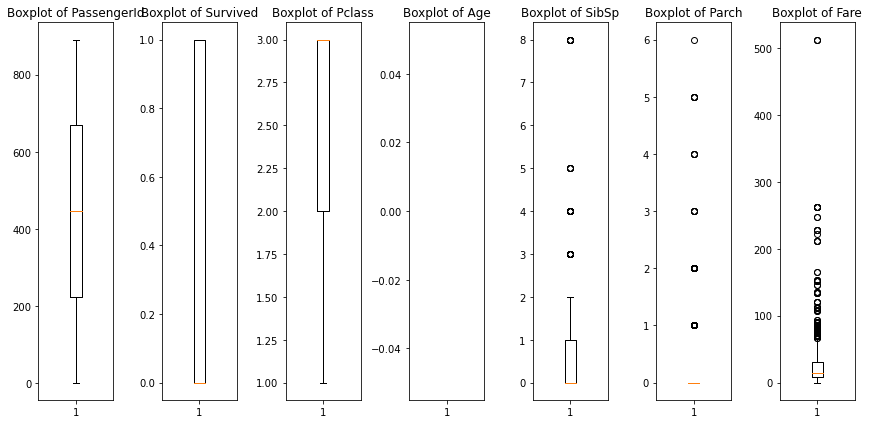

In [34]:
# Sayısal sütunları seçme
numeric_columns = dataset.select_dtypes(include=['number']).columns

# Her bir sayısal sütun için ayrı ayrı boxplot çizme
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_columns), figsize=(12, 6))

for i, column in enumerate(numeric_columns):
    axes[i].boxplot(dataset[column])
    axes[i].set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

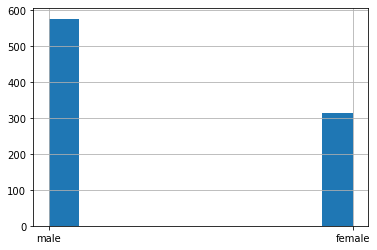

In [25]:
dataset['Sex'].hist()
plt.show()

In [35]:
# Grafikler yardımıyla veri içerisindeki çarpıklıklar, uç değerler ve oranlar görülmüştür. Görülen bilgilere göre, 
# verinin büyük kısmı erkeklerden oluşmakta, hayatta kalanlar daha az sayıda, SibSp, Parch ve Fare alanlarında uç değerler
# bulunmakta, Fare, SibSp, Parch ve Age alanlarında çarpıklık bulunmaktadır. 